## Determine Groups
This notebook is aimed at creating groups from our data in a data-drive way. Several methods will be experimented with till we find one that fits our data best.

In [2]:
# load the data in and check min, max, and counts
from pandas import DataFrame, Series, read_csv
import numpy as np

project_home = '/home/camachocm2/Analysis/aggregate_anats/AB_poster/'
data_file = project_home + 'subject_data.csv'
data = read_csv(data_file)
cbq_data= data.iloc[:,14:29]
cbq_data.describe()

,activity_level,anger_frustration,approach,attention_focusing,discomfort,soothability,fear,high_intensity_pleasure,impulsivity,inhibitory_control,low_intensity_pleasure,perceptual_sensitivity,sadness,shyness,smiling_laughter
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,4.554847,4.135446,4.991101,4.745506,4.053571,4.489554,3.656274,4.519375,4.261905,4.752976,5.247396,5.159226,4.167139,3.544702,5.376518
std,1.036872,1.573917,0.923782,1.219858,1.129993,1.176050,1.397566,1.269470,0.968398,1.133259,1.167233,0.989026,1.001377,1.198024,0.785517
min,2.142857,1.000000,2.500000,1.000000,1.333333,1.333333,0.833333,1.666667,2.000000,1.833333,2.000000,2.000000,1.428571,1.000000,2.666667
25%,3.857143,3.000000,4.333333,4.000000,3.166667,3.666667,2.500000,3.791667,3.500000,3.958333,4.500000,4.500000,3.571429,2.666667,4.833333
50%,4.571429,3.833333,5.000000,4.833333,3.833333,4.666667,3.500000,4.666667,4.250000,4.833333,5.500000,5.333333,4.142857,3.666667,5.500000
75%,5.285714,5.541667,5.666667,5.708333,4.833333,5.500000,4.541667,5.541667,4.833333,5.500000,6.125000,5.833333,4.857143,4.333333,6.000000
max,6.714286,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.833333,6.666667,7.000000,7.000000,7.000000,6.571429,6.333333,7.000000


In [12]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(cbq_data)
std_cbq = std.fit_transform(cbq_data)
labels = []
for a in cbq_data.columns:
    labels.append(a + '_std')
std_cbq_data = DataFrame(data=std_cbq,columns=labels)
std_cbq_data.describe()

,activity_level_std,anger_frustration_std,approach_std,attention_focusing_std,discomfort_std,soothability_std,fear_std,high_intensity_pleasure_std,impulsivity_std,inhibitory_control_std,low_intensity_pleasure_std,perceptual_sensitivity_std,sadness_std,shyness_std,smiling_laughter_std
count,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02
mean,3.687526e-16,5.947623e-18,-1.427430e-16,-1.110223e-16,1.586033e-17,3.251367e-16,1.070572e-16,-2.696256e-16,1.506731e-16,3.330669e-16,-5.709718e-16,6.542386e-16,-1.308477e-16,2.061843e-16,-4.044384e-16
std,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00
min,-2.336672e+00,-2.001083e+00,-2.708752e+00,-3.084245e+00,-2.418123e+00,-2.695809e+00,-2.028976e+00,-2.257265e+00,-2.346216e+00,-2.587904e+00,-2.794635e+00,-3.208637e+00,-2.747094e+00,-2.133630e+00,-3.465271e+00
25%,-6.759173e-01,-7.246567e-01,-7.152380e-01,-6.138885e-01,-7.884030e-01,-7.028489e-01,-8.310666e-01,-5.758144e-01,-7.903042e-01,-7.043531e-01,-6.431918e-01,-6.695366e-01,-5.975650e-01,-7.361973e-01,-6.946071e-01
50%,1.606391e-02,-1.928125e-01,9.676350e-03,7.232164e-02,-1.957775e-01,1.512768e-01,-1.123211e-01,1.165476e-01,-1.234831e-02,7.122669e-02,2.173854e-01,1.768302e-01,-2.435736e-02,1.022621e-01,1.579050e-01
75%,7.080449e-01,8.974681e-01,7.345906e-01,7.928423e-01,6.931607e-01,8.630483e-01,6.363721e-01,8.089096e-01,5.927282e-01,6.621446e-01,7.552461e-01,6.846502e-01,6.921522e-01,6.612351e-01,7.972891e-01
max,2.092007e+00,1.828196e+00,2.184419e+00,1.856468e+00,2.619194e+00,2.144237e+00,2.403288e+00,1.830968e+00,2.494398e+00,1.991710e+00,1.508251e+00,1.869564e+00,2.411775e+00,2.338154e+00,2.076057e+00


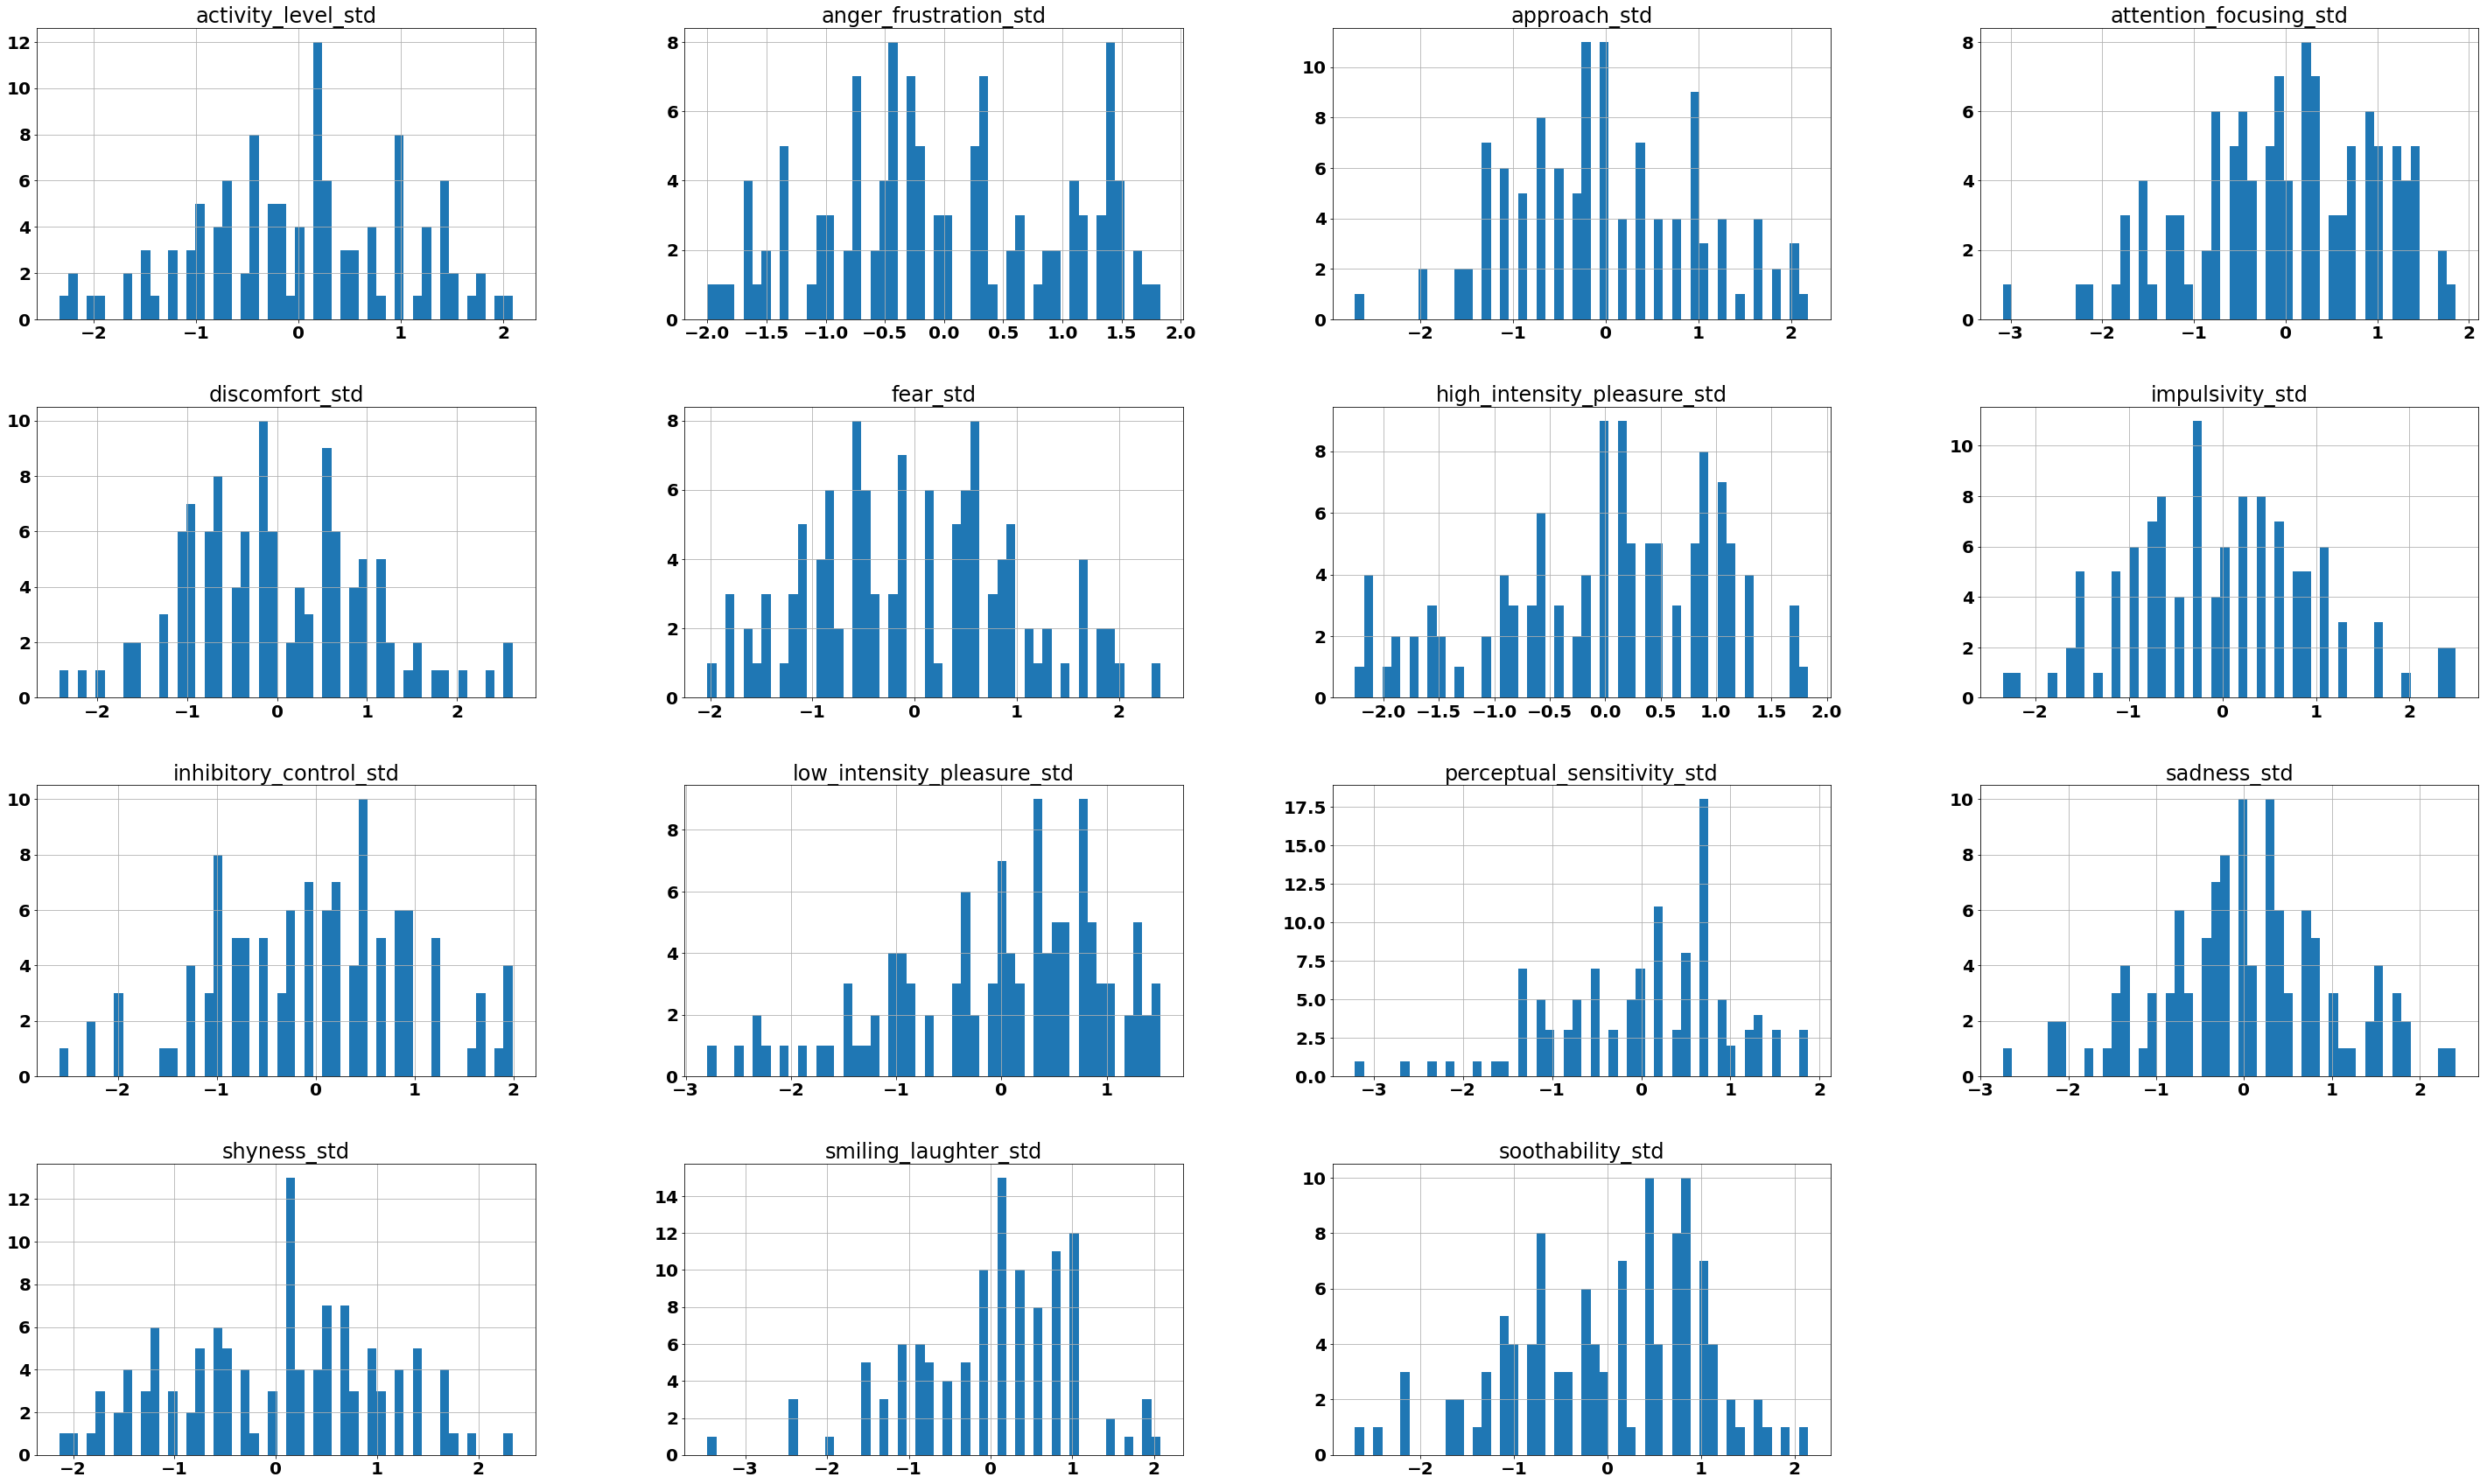

In [13]:
import matplotlib.pyplot as plt
import matplotlib

font = {'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
std_cbq_data.hist(bins=50, figsize=(50,30))
plt.show()

In [66]:
# Decompose the data down to the principle components capturing 95% of the variance
from sklearn.decomposition import PCA
from numpy import sum

pca = PCA(random_state=0)
pca_fit = pca.fit_transform(std_cbq)
cbq_back=pca.inverse_transform(pca_fit)
#print(pca.components_)
print(sum(pca.explained_variance_ratio_[:10]))
cbq_components = cbq_back[:,:10]
cbq_components.shape

0.9043201881131268


(112, 10)

silhouette average for 3 clusters:0.15702711505377606
[ 1.13688666 -0.75721863  0.25175469] [ 0.70453686 -0.53400941  0.23737376]


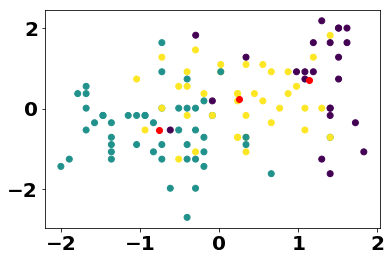

In [68]:
# Use K-means to cluster the data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import unique

#for n in [2,3,4,5,6]:
for n in [3]:
    kmeans = KMeans(n_clusters=n, random_state=0, max_iter=500).fit(cbq_components)
    silhouette_avg = silhouette_score(cbq_components, kmeans.fit_predict(cbq_components))
    print('silhouette average for '+ str(n) + ' clusters:' + str(silhouette_avg))

    cluster_centers = kmeans.cluster_centers_
    print(cluster_centers[:,1],cluster_centers[:,2])
    plt.scatter(cbq_components[:,1],cbq_components[:,2], c=kmeans.labels_)
    plt.scatter(cluster_centers[:,1],cluster_centers[:,2], c='red')
    plt.savefig(project_home + 'component_scatter.png')
    plt.show()

In [70]:
groups = kmeans.labels_
std_cbq_data['kmgroup'] = Series(groups, index=None, name='kmgroup')
all_data = data.join(std_cbq_data)
all_data.to_csv(project_home + 'kmeans_group_data.csv')

group_names, group_ns = unique(groups, return_counts=True)
print(group_ns)

std_cbq_data_m = std_cbq_data.groupby('kmgroup').mean()
std_cbq_data_m.to_csv(project_home + 'kmeans_group_summary_data.csv')
print(std_cbq_data.columns)

[24 49 39]
Index(['activity_level_std', 'anger_frustration_std', 'approach_std',
       'attention_focusing_std', 'discomfort_std', 'soothability_std',
       'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
       'inhibitory_control_std', 'low_intensity_pleasure_std',
       'perceptual_sensitivity_std', 'sadness_std', 'shyness_std',
       'smiling_laughter_std', 'kmgroup'],
      dtype='object')


<Figure size 2880x720 with 0 Axes>

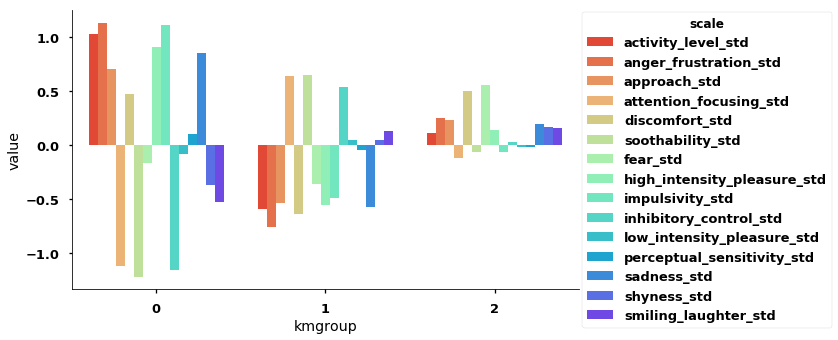

In [74]:
# Visualize the new groups
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import melt
font = {'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
sns.set_context("talk")

long_std_cbq = melt(std_cbq_data, id_vars=['kmgroup'],
                    value_vars=['activity_level_std', 'anger_frustration_std', 'approach_std',
                                'attention_focusing_std', 'discomfort_std', 'soothability_std',
                                'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
                                'inhibitory_control_std', 'low_intensity_pleasure_std',
                                'perceptual_sensitivity_std', 'sadness_std', 'shyness_std',
                                'smiling_laughter_std'], 
                    var_name='scale',
                    value_name='value')
#long_std_cbq
plt.figure(figsize=(40,10))
#sns.boxplot(x='kmgroup',y='value',hue='scale',data=long_std_cbq)
#plt.xticks(rotation=90)
#plt.savefig(project_home + 'practice_qs/2groups.png',transparent=True,bbox_inches='tight',pad_inches=2)
#plt.show()
sns.factorplot(x='kmgroup', y='value',hue='scale',data=long_std_cbq, 
               kind='bar',size=5,palette='rainbow_r',legend=True, aspect=1.75, ci=None)
plt.savefig(project_home + 'groups_plots.png',transparent=False)


In [80]:
from numpy import empty
from scipy.stats import linregress

final_std_err = empty((112,8))

count = 0
for region in ['r_putamen','l_putamen','r_pallidum','l_pallidum','r_caudate','l_caudate','r_nacc','l_nacc']:
    tslope, tintercept, tr_value, tp_value, tstd_err = linregress(data['male'],data[region])
    #final_slope, final_intercept, final_r_value, final_p_value, final_std_err[:,count] = linregress(data['eTIV'],tstd_err)
    #count = count + 1

print(final_std_err.shape)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [85]:
linregress(data['male'],data[region])

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

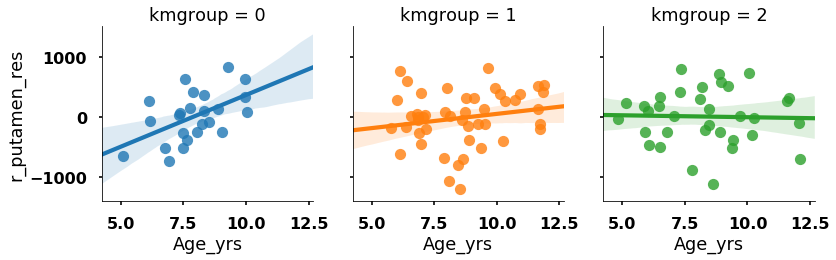

In [98]:
import seaborn as sns

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

data = read_csv(project_home + 'kmeans_group_data.csv', index_col=0)

sns.set_context("poster")
# Visualize results
#data.describe()

#plt.scatter(data['Age_yrs'],data['l_putamen_res'], c=data['kmgroup'])
sns.lmplot(x='Age_yrs',y='r_putamen_res', col='kmgroup', hue='kmgroup', data=data, 
           ci=95, size=4)
plt.savefig(project_home + 'r_putamen_age.png',transparent=True)
plt.show()

In [9]:
data.columns.values

array(['SubjectID', 'Age_yrs', 'male', 'sequence', 'eTIV', 'r_putamen',
       'l_putamen', 'r_pallidum', 'l_pallidum', 'r_caudate', 'l_caudate',
       'r_thalamus', 'l_thalamus', 'r_nacc', 'l_nacc', 'activity_level',
       'anger_frustration', 'approach', 'attention_focusing',
       'discomfort', 'soothability', 'fear', 'high_intensity_pleasure',
       'impulsivity', 'inhibitory_control', 'low_intensity_pleasure',
       'perceptual_sensitivity', 'sadness', 'shyness', 'smiling_laughter',
       'activity_level_std', 'anger_frustration_std', 'approach_std',
       'attention_focusing_std', 'discomfort_std', 'soothability_std',
       'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
       'inhibitory_control_std', 'low_intensity_pleasure_std',
       'perceptual_sensitivity_std', 'sadness_std', 'shyness_std',
       'smiling_laughter_std', 'kmgroup', 'r_putamen_res',
       'l_putamen_res', 'r_pallidum_res', 'l_pallidum_res',
       'r_caudate_res', 'l_caudate_res', 'r

In [8]:
from pandas import read_csv, DataFrame, Series

data = read_csv(project_home + 'kmeans_group_data.csv', index_col=0)
data.describe()

,Age_yrs,male,sequence,eTIV,r_putamen,l_putamen,r_pallidum,l_pallidum,r_caudate,l_caudate,...,r_putamen_res,l_putamen_res,r_pallidum_res,l_pallidum_res,r_caudate_res,l_caudate_res,r_nacc_res,l_nacc_res,CBCL_intern,CBCL_extern
count,111.000000,111.000000,111.000000,1.110000e+02,105.000000,106.000000,109.000000,107.000000,108.000000,106.000000,...,1.050000e+02,1.060000e+02,1.090000e+02,1.070000e+02,1.080000e+02,1.060000e+02,1.110000e+02,1.110000e+02,105.000000,105.000000
mean,8.312732,0.513514,1.765766,1.484405e+06,5424.980952,5419.838679,1925.454128,2010.455140,3999.745370,3869.219811,...,-1.904762e-07,-2.319319e-14,3.669725e-07,-4.672897e-07,-5.555556e-07,-4.716981e-07,3.603604e-07,-3.603604e-07,7.123810,10.390476
std,1.754863,0.502084,0.785724,1.425070e+05,590.474287,656.886635,259.239939,247.947702,533.577684,496.978192,...,4.433281e+02,5.133177e+02,2.089390e+02,2.002803e+02,4.045909e+02,4.050412e+02,7.928006e+01,8.635923e+01,8.913791,12.709396
min,4.840520,0.000000,1.000000,1.142335e+06,4038.400000,3556.100000,1396.600000,1585.200000,2726.100000,2531.100000,...,-1.198418e+03,-1.319434e+03,-4.451497e+02,-4.582661e+02,-9.560202e+02,-8.001761e+02,-1.797758e+02,-2.241786e+02,0.000000,0.000000
25%,6.950034,0.000000,1.000000,1.385205e+06,4959.700000,4977.550000,1746.900000,1806.850000,3671.450000,3604.825000,...,-2.494381e+02,-3.730210e+02,-1.488958e+02,-1.507310e+02,-2.924882e+02,-2.820375e+02,-5.877619e+01,-5.646268e+01,1.000000,1.000000
50%,8.221766,1.000000,2.000000,1.488072e+06,5405.400000,5462.500000,1893.200000,1991.800000,4048.900000,3868.800000,...,2.608966e+01,9.008757e+01,-3.065441e+01,-2.861940e+00,-1.061407e+01,-2.582820e+01,3.632530e+00,-1.235434e+01,4.000000,4.000000
75%,9.400411,1.000000,2.000000,1.577459e+06,5874.700000,5788.050000,2102.300000,2197.350000,4278.500000,4079.000000,...,3.133490e+02,3.363175e+02,1.370403e+02,1.413415e+02,2.516263e+02,2.643743e+02,5.228468e+01,5.522980e+01,10.000000,18.000000
max,12.084873,1.000000,3.000000,1.943317e+06,6926.400000,6961.200000,2656.300000,2712.700000,5360.700000,5236.000000,...,8.325999e+02,1.026731e+03,6.512491e+02,5.159346e+02,9.423300e+02,9.238201e+02,2.232307e+02,2.220827e+02,47.000000,46.000000


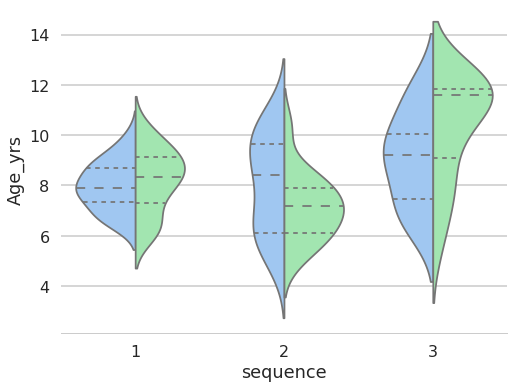

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(8,6))
sns.set(style="whitegrid",  palette="pastel", color_codes=True)
sns.violinplot(x="sequence", y="Age_yrs", hue="male", data=data, split=True,
               inner="quart")
sns.despine(left=True)
ax.legend_.remove()
plt.savefig(project_home + 'age_sex_sample.png')

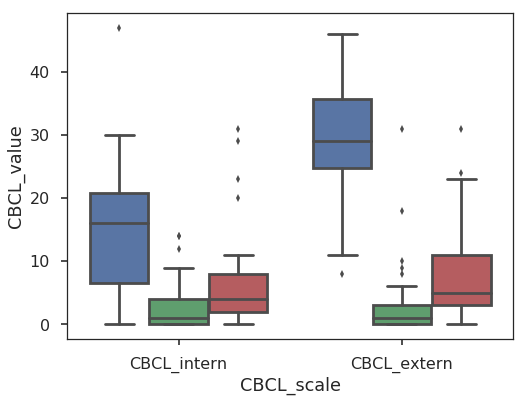

In [14]:
from pandas import melt
sns.set(style="ticks")
sns.set_context("poster")

long_cbcl = melt(data, id_vars=['SubjectID', 'Age_yrs', 'male', 'sequence', 'eTIV', 'r_putamen',
                                'l_putamen', 'r_pallidum', 'l_pallidum', 'r_caudate', 'l_caudate',
                                'r_thalamus', 'l_thalamus', 'r_nacc', 'l_nacc', 'activity_level',
                                'anger_frustration', 'approach', 'attention_focusing',
                                 'discomfort', 'soothability', 'fear', 'high_intensity_pleasure',
                                'impulsivity', 'inhibitory_control', 'low_intensity_pleasure',
                                'perceptual_sensitivity', 'sadness', 'shyness', 'smiling_laughter',
                                'activity_level_std', 'anger_frustration_std', 'approach_std',
                                'attention_focusing_std', 'discomfort_std', 'soothability_std',
                                'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
                                'inhibitory_control_std', 'low_intensity_pleasure_std',
                                'perceptual_sensitivity_std', 'sadness_std', 'shyness_std',
                                'smiling_laughter_std', 'kmgroup', 'r_putamen_res',
                                'l_putamen_res', 'r_pallidum_res', 'l_pallidum_res',
                                'r_caudate_res', 'l_caudate_res', 'r_nacc_res', 'l_nacc_res',],
                    value_vars=['CBCL_intern', 'CBCL_extern'], 
                    var_name='CBCL_scale',
                    value_name='CBCL_value')
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='CBCL_scale', y='CBCL_value', data=long_cbcl, hue='kmgroup')
ax.legend_.remove()
plt.savefig(project_home + 'cbcl_groups.png')